# Задача 1. Разведочный анализ

* **Дедлайн**: 08.10.2023, 23:59
* **Основной полный балл**: 5
* **Максимум баллов**: 10

## Задача

- [x] Самостоятельно скачать данные (из открытых источников по интересующей тематике, на сайте [kaggle](https://www.kaggle.com), [UCI](https://archive.ics.uci.edu/ml/datasets.php) репозитория, [Google Dataset Search](https://datasetsearch.research.google.com/) и др.). Для полного балла нужно выбрать данные, в которых есть пропущенные значения.
- [x] Считать данные и вывести их основные характеристики, описание признаков.
- [x] Сформулировать задачу предсказания, какой признак интересно было бы предсказывать по остальным.
- [x] * (+2 балла) Произвести чистку данных (**Data Cleaning**). Например, заполнить пропущенные значения чем то осмысленным для поставленной задачи.
- [x] Провести анализ признаков, используя визуализацию (**hist(), boxplot(), countplot(), barplot()** и тд), сделать выводы, которые могут быть полезны при дальнейшем решении задачи предсказания.
- [x] * (+1 балл) Оценить зависимость между признаками (визуализация или построение матрицы корреляции).
- [x] * (+2 балла) Выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные если это нужно), убрать ненужные признаки, создать новые (**Feature Engineering**).

In [139]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Описание датасета

Датасет https://www.kaggle.com/datasets/lava18/google-play-store-apps

Признаки 

* App: Название приложения
* Category: Категория приложения
* Rating: Рейтинг приложения
* Reviews: Количество отзывов
* Size: Размер приложения
* Installs: Количество установок
* Type: Бесплатное (Free) или платное (Paid) приложение
* Price: Цена приложения
* Content Rating: Возрастная категория приложения
* Genres: Жанры приложения
* Last Updated: Дата последнего обновления
* Current Ver: Текущая версия
* Android Ver: Минимальная версия Android, необходимая для работы приложения


Будем решать задачу регрессии: пытаться предсказать **рейтинг приложения** по остальным признакам

In [140]:
df_apps = pd.read_csv('googleplaystore.csv')

In [141]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [142]:
df_apps.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Существует записи со значением рейтинга больше пяти, расммотрим их

In [143]:
df_apps[df_apps['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Всего одна запись. Вероятно, просто ошибка, поэтому удалим ее из датасета

In [144]:
df_apps = df_apps.drop(df_apps[df_apps['Rating'] > 5].index)

Аналогичная ситуация с Installs: Free

In [145]:
df_apps = df_apps.drop(df_apps[df_apps['Installs'] == 'Free'].index)

In [146]:
df_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Рассмотрим распределение рейтингов

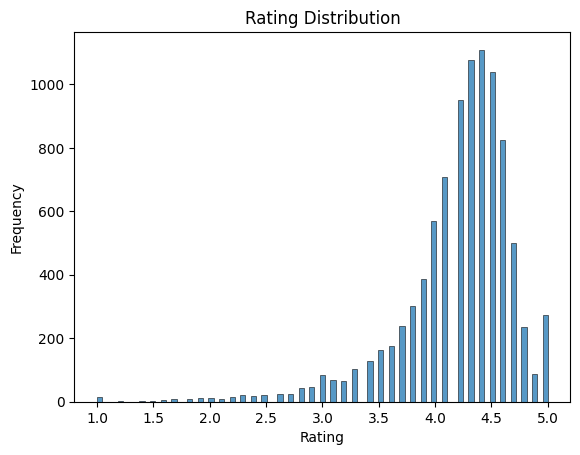

In [147]:
plt.figure()
sns.histplot(df_apps["Rating"].dropna())
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

Рассмотрим количество платных и бесплатных приложений

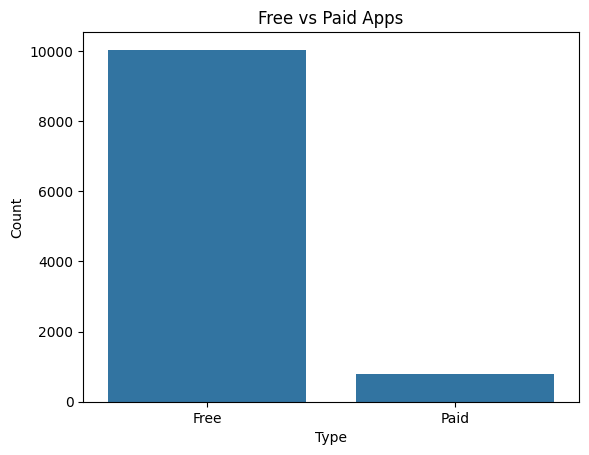

In [148]:
plt.figure()
sns.countplot(x="Type", data=df_apps)
plt.title("Free vs Paid Apps")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

Большинство приложений из датасета являются бесплатными

Вероятно, выставление оценки приложению зависит от возрастной категории, поскольку критерии,
понравится ли приложение пользователю вполне вероятно могут зависить от возраста

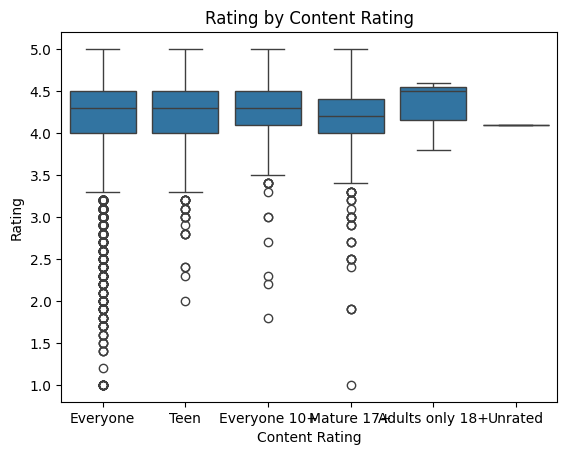

In [149]:
plt.figure()
sns.boxplot(x="Content Rating", y="Rating", data=df_apps)
plt.title("Rating by Content Rating")
plt.xlabel("Content Rating")
plt.ylabel("Rating")
plt.show()

Больших различий между возрастной категорией при оценки рейтинга нет

Также проверим, как меняется рейтинг в зависимости от того, является ли приложение платным

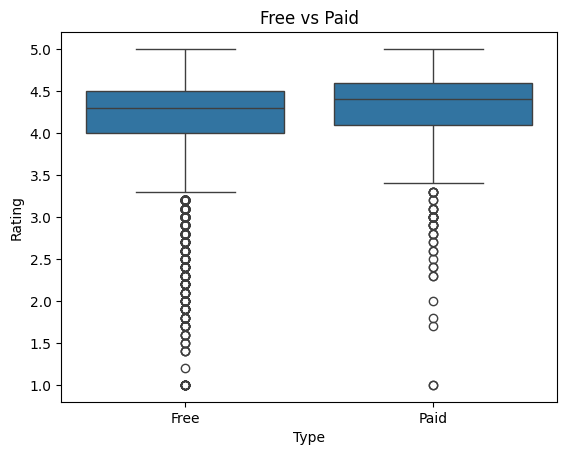

In [150]:
plt.figure()
sns.boxplot(x="Type", y="Rating", data=df_apps)
plt.title("Free vs Paid")
plt.xlabel("Type")
plt.ylabel("Rating")
plt.show()

Также больших различий не обнаружено

В нашем датасете много пропущенных значений, заполним их

Заполняем пропущенные рейтинги средним значением по категории

In [151]:
df_apps["Rating"] = df_apps.groupby("Category")["Rating"].transform(lambda x: x.fillna(x.mean()))

Заполняем пропущенные значения в столбце Type


In [152]:
df_apps["Type"].fillna("Free", inplace=True)

Заполняем пропущенные значения в столбце Category


In [153]:
df_apps["Category"].fillna("Unknown", inplace=True)

Заполняем пропущенные значения в столбце Content Rating


In [154]:
df_apps["Content Rating"].fillna("Everyone", inplace=True)

Прежде чем проводить оценку зависимостей между признаками, произведем преобразования данных

Для начала удалим ненужные столбцы

In [155]:
df_apps = df_apps.drop(columns=["App", "Last Updated", "Current Ver", "Android Ver"])

In [156]:
df_apps.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


Сделаем преобразования, например, убрав '+' из числа установок

In [157]:
df_apps["Installs"] = df_apps["Installs"].apply(lambda x: x.replace("+", "") if "+" in x else x)
df_apps["Installs"] = df_apps["Installs"].apply(lambda x: x.replace(",", "") if "," in x else x)
df_apps["Installs"] = pd.to_numeric(df_apps["Installs"])

df_apps["Price"] = df_apps["Price"].apply(lambda x: x.replace("$", "") if "$" in x else x)
df_apps["Price"] = df_apps["Price"].apply(lambda x: x.replace("Free", "0") if "$" in x else x)
df_apps["Price"] = pd.to_numeric(df_apps["Price"])


df_apps["Size"] = df_apps["Size"].apply(lambda x: x.replace("M", "") if "M" in x else x)
df_apps["Size"] = df_apps["Size"].apply(lambda x: x.replace("k", "e-3") if "k" in x else x)
df_apps["Size"] = df_apps["Size"].apply(lambda x: x.replace("Varies with device", "0") if "Varies with device" in x else x)
df_apps["Size"] = pd.to_numeric(df_apps["Size"], errors="coerce")
df_apps["Size"] = df_apps["Size"].apply(lambda x: x * 1e-3 if "e-3" in str(x) else x)

df_apps["Size"] = df_apps.groupby("Category")["Size"].transform(lambda x: x.replace(0, x.mean()))

In [158]:
df_apps.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity


Теперь закодируем значения

In [159]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_apps["Category"] = le.fit_transform(df_apps["Category"])
df_apps["Type"] = le.fit_transform(df_apps["Type"])
df_apps["Content Rating"] = le.fit_transform(df_apps["Content Rating"])
df_apps["Genres"] = le.fit_transform(df_apps["Genres"])

In [160]:
df_apps.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0,4.1,159,19.0,10000,0,0.0,1,9
1,0,3.9,967,14.0,500000,0,0.0,1,12
2,0,4.7,87510,8.7,5000000,0,0.0,1,9
3,0,4.5,215644,25.0,50000000,0,0.0,4,9
4,0,4.3,967,2.8,100000,0,0.0,1,11


Наконец, построим корреляционную матрицу

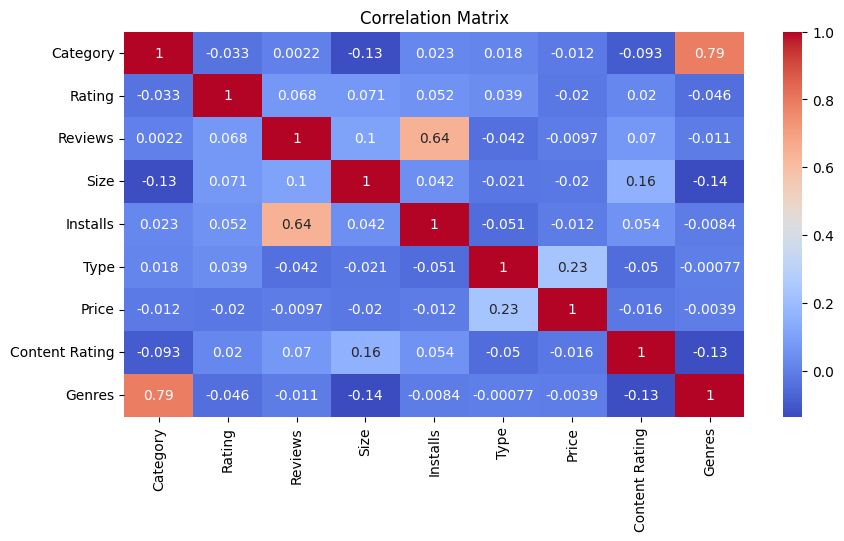

In [161]:
df_apps_corr = df_apps.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(df_apps_corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Помимо очевидных зависимостей, как, например, между жанром и категорией, значимых положительных/отрицательных корреляций нет.

Существует небольшая положительная корреляция между рейтингом и кол-вом установок приложения.